In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers

In [2]:
from emnist import list_datasets

In [3]:
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [4]:
from emnist import extract_training_samples
from emnist import extract_test_samples

In [5]:
x_train,y_train = extract_training_samples('byclass')

In [6]:
x_test,y_test = extract_test_samples('byclass')

In [7]:
np.unique(y_test,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], dtype=uint8),
 array([5778, 6330, 5869, 5969, 5619, 5190, 5705, 6139, 5633, 5686, 1062,
         648, 1739,  779,  851, 1440,  447,  521, 2048,  626,  382,  810,
        1485, 1351, 4156, 1397,  413,  809, 3508, 1576, 2002,  796,  806,
         432,  798,  464, 1644,  853,  432, 1683, 4092,  400,  589, 1479,
         427,  317,  466, 2535,  464, 1898,  466,  368,  505, 2320,  437,
        2965,  482,  468,  467,  470,  381,  451], dtype=int64))

In [8]:
print(x_train.shape)
print(y_train.shape)

(697932, 28, 28)
(697932,)


In [9]:
x_train[0].shape

(28, 28)

In [10]:
import matplotlib.pyplot as plt

Text(0.5, 0, '20')

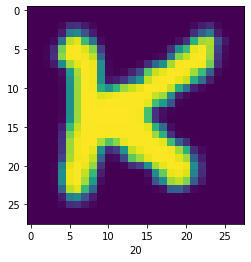

In [11]:
plt.imshow(x_train[110])
plt.xlabel(y_train[110])


In [12]:
x_train = x_train.reshape(-1, 28*28).astype("float32")/255


In [13]:
x_test = x_test.reshape(-1,28*28).astype("float32")/255

In [16]:
model = keras.Sequential([

    layers.Dense(512,activation='relu',input_dim=784),
    layers.Dense(256,activation='relu'),
    layers.Dense(62,activation='softmax')
    
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 62)                15934     
Total params: 549,182
Trainable params: 549,182
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [19]:
model.fit(x_train, y_train, batch_size=64, verbose=2,epochs=5)

Epoch 1/5
10906/10906 - 57s - loss: 0.5746 - accuracy: 0.8093
Epoch 2/5
10906/10906 - 20s - loss: 0.4495 - accuracy: 0.8408
Epoch 3/5
10906/10906 - 20s - loss: 0.4237 - accuracy: 0.8475
Epoch 4/5
10906/10906 - 19s - loss: 0.4087 - accuracy: 0.8513
Epoch 5/5
10906/10906 - 19s - loss: 0.3984 - accuracy: 0.8544


In [25]:
pred = model.predict(x_test[:100])

In [26]:
pred

array([[3.8650262e-07, 5.2111053e-01, 1.2091714e-07, ..., 3.0234029e-09,
        4.5020333e-06, 2.6591466e-16],
       [5.9539584e-06, 3.8111802e-06, 3.6984622e-02, ..., 2.8194516e-10,
        5.6856726e-07, 5.4867701e-08],
       [5.9227920e-01, 1.1324026e-08, 4.9382884e-08, ..., 1.8236319e-15,
        6.0204363e-12, 1.2617561e-10],
       ...,
       [2.5736979e-09, 2.1334968e-08, 9.9877387e-01, ..., 5.5367267e-13,
        1.3412366e-15, 2.4481094e-05],
       [4.6498064e-15, 1.9736430e-14, 1.3072469e-16, ..., 1.6729241e-14,
        1.5306539e-09, 1.0449816e-26],
       [3.7589286e-06, 1.5418791e-11, 4.7933257e-10, ..., 4.8039511e-14,
        9.5311758e-10, 8.6098321e-13]], dtype=float32)

In [27]:
y = [np.argmax(element) for element in pred]

In [28]:
y[:20]

[1, 36, 0, 3, 33, 30, 24, 40, 5, 8, 2, 4, 2, 1, 2, 3, 7, 32, 7, 5]

In [29]:
y_test[:20]

array([18, 36,  0,  3, 33, 30, 24, 40,  5,  8,  2,  4,  2, 47,  2,  3,  7,
       32,  7,  5], dtype=uint8)

In [27]:
model.evaluate(x_test,y_test,batch_size=64)

1818/1818 [==============================] - 7s 2ms/step - loss: 0.4517 - accuracy: 0.8441


[0.45167502760887146, 0.8440806865692139]